참조 : https://qiskit.org/textbook/ch-algorithms/simon.html

### 문제정의
- 함수 $f$는 1:1이거나 2:1임
- 2:1의 경우 숨은 변수 $b$와 입력은 다음의 관계가 성립함
  - 만약 $x_1 \neq x_2, f(x_1) = f(x_2)$이면, $x_1 \oplus x_2 = b$
- 1:1의 경우 $b=\mathbf{0}$, 2:1이라면 $b$의 값은?

![Simons' Algorithm](https://qiskit.org/textbook/ch-algorithms/images/simon_steps.png)

### $Q_f$의 정의
$$
|x\rangle|a\rangle \rightarrow |x\rangle|a \oplus f(x)\rangle
$$

$a = |0\rangle = |00\ldots0\rangle$ 이면,
$$
|x\rangle|0\rangle \rightarrow |x\rangle|f(x)\rangle
$$


$$
\begin{align}\\
|\psi_1\rangle &= |0\rangle^{\otimes n}|0\rangle^{\otimes n}\\
|\psi_2\rangle &= \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} |x\rangle |0\rangle^{\otimes n} \\
|\psi_3\rangle &= \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} |x\rangle |f(x)\rangle \\
\end{align}
$$

second register를 측정하면 어떤 $f(x)$ 값이 관측되고, 문제의 정의에 따라서 first register는 $x$와 $y=x \oplus b$의 중첩상태이다.

$$
\begin{align}\\
|\psi_4\rangle &= \frac{1}{\sqrt{2}} \big(|x\rangle + |y\rangle \big) \\
|\psi_5\rangle &= \frac{1}{\sqrt{2^{n+1}}} \sum_{z=0}^{2^n-1} [(-1)^{x \cdot z} + (-1)^{y \cdot z}]|z\rangle \\
\end{align}
$$

first register의 측정은 다음의 조건이 맞는 경우이다.
$$
\begin{align}\\
(-1)^{x \cdot z} &= (-1)^{y \cdot z}
\end{align}
$$
따라서
$$
\begin{align}\\
x \cdot z &= y \cdot z \\
x \cdot z &= (x \oplus b) \cdot z \\
x \cdot z &= x \cdot z \oplus b \cdot z \\
b \cdot z &= 0 \text{ (mod 2)} \\
\end{align}
$$

여러번 ($\approx n$) 측정하여 아래의 방정식을 $b$에 대해 푼다.
$$ \begin{cases} b \cdot z_1 = 0 \\ b \cdot z_2 = 0 \\ \quad \vdots \\ b \cdot z_n = 0 \end{cases}$$

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
s = '10'

input_qubits = len(str(s))

total_qubits = 2 * input_qubits

qc = QuantumCircuit(total_qubits, input_qubits)

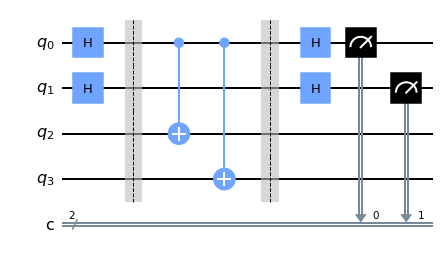

In [3]:
qc.h(range(input_qubits))
qc.barrier()

for idx in range(input_qubits):
    if(s[idx] == '1'):
        for count in range(input_qubits):
            qc.cx(idx, input_qubits + count)
qc.barrier()

qc.h(range(input_qubits))
qc.measure([0, 1], [0, 1])

qc.draw('mpl')

counts: {'01': 487, '00': 513}


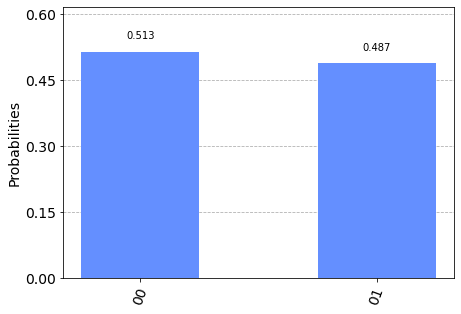

In [4]:
backend = Aer.get_backend('qasm_simulator')

results = execute(qc, backend=backend, shots=1000).result()

counts = results.get_counts(qc)
print('counts:', counts)

plot_histogram(counts)